## Preprocessing

Here we prepare data as follows:
- All the wav files are in the unified format.
- Convert them to melspectrogram on-memory data.


In [1]:
ORGDATADIR = '../../dataset/UrbanSound8K'
DATADIR =  './16kmono_UrbanSound8K'
DATASET_PREFIX = 'usd_'

import os, sys
sys.path.append('common')
import util, audio_preprocessing
%matplotlib inline

all_files = util.list_files(os.path.join(ORGDATADIR, 'audio/*/*wav'))

In [2]:
print(os.path.dirname(all_files[0].replace(ORGDATADIR, DATADIR)), all_files[0].replace(ORGDATADIR, DATADIR))

./16kmono_UrbanSound8K/audio/fold1 ./16kmono_UrbanSound8K/audio/fold1/164053-8-2-3.wav


In [5]:
# Convert all the original data and write to DATADIR folder.

for f in all_files:
    a = audio_preprocessing.librosa_load_audio_as_mono(f)
    targ = f.replace(ORGDATADIR, DATADIR)
    util.ensure_folder(os.path.dirname(targ))
    audio_preprocessing.write_audio(targ, a, audio_preprocessing.default_sampling_rate)

### Preprocess files to on-memory data

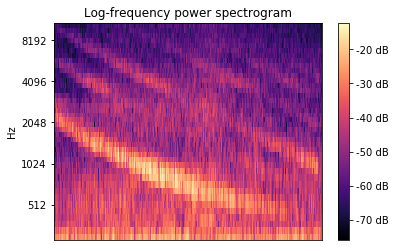

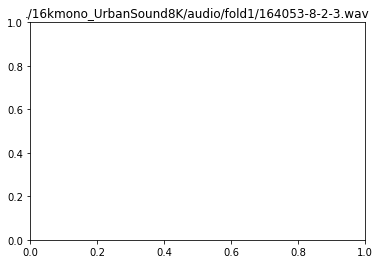

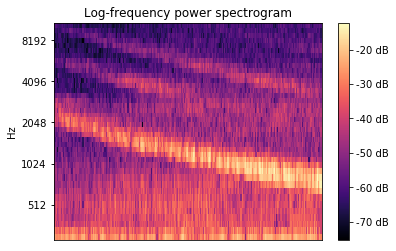

In [6]:
# Test
all_unifiles = [f.replace(ORGDATADIR, DATADIR) for f in all_files]

x, sr = audio_preprocessing.read_audio(all_unifiles[0])
mels = audio_preprocessing.wavfile_to_melspectrogram(all_unifiles[0], debug_display=True)
mels2 = util.unify_2d_length(mels, 256)
audio_preprocessing.show_melspectrogram(mels2)

In [7]:
import pandas as pd
import numpy as np

traindata = pd.read_csv(os.path.join('.', DATASET_PREFIX+'train_list.csv'))
valdata = pd.read_csv(os.path.join('.', DATASET_PREFIX+'validation_list.csv'))
testdata = pd.read_csv(os.path.join('.', DATASET_PREFIX+'test_list.csv'))

def convert_dataset_process1(pd_list):
    xylist = [(int(pd_list.classID[k]), os.path.join(DATADIR, 'audio/fold%d/%s' % (pd_list.fold[k], pd_list.slice_file_name[k])))
                            for k in range(len(pd_list))]
    Xs = [audio_preprocessing.wavfile_to_melspectrogram(xy[1]) for xy in xylist]
    ys = np.array([xy[0] for xy in xylist])
    return Xs, ys

def convert_dataset_process2(Xss):
    uni_length = util.get_2d_mode_length(util.flatten_list(Xss))
    return [np.array([util.unify_2d_length(x, uni_length) for x in Xs]) for Xs in Xss]

X_train, y_train = convert_dataset_process1(traindata)
X_valid, y_valid = convert_dataset_process1(valdata)
X_test, y_test = convert_dataset_process1(testdata)
X_train, X_valid, X_test = convert_dataset_process2([X_train, X_valid, X_test])

In [8]:
X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape

((5969, 40, 552), (990, 40, 552), (936, 40, 552), (5969,), (990,), (936,))

In [9]:
np.save(DATASET_PREFIX+'X_train.npy', X_train)
np.save(DATASET_PREFIX+'y_train.npy', y_train)
np.save(DATASET_PREFIX+'X_valid.npy', X_valid)
np.save(DATASET_PREFIX+'y_valid.npy', y_valid)
np.save(DATASET_PREFIX+'X_test.npy', X_test)
np.save(DATASET_PREFIX+'y_test.npy', y_test)

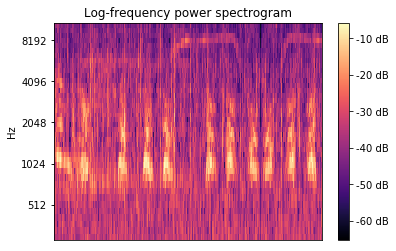

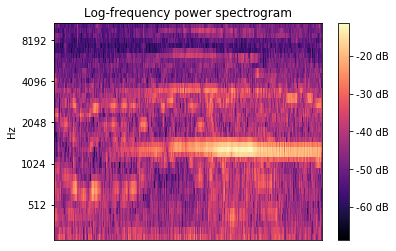

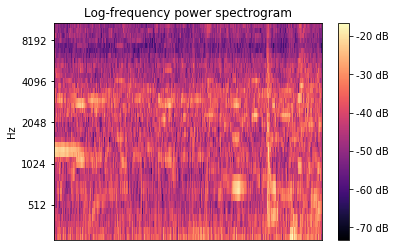

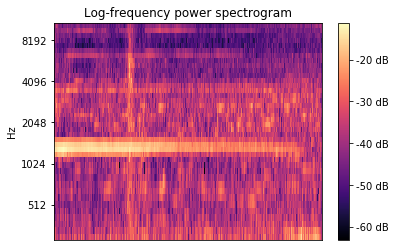

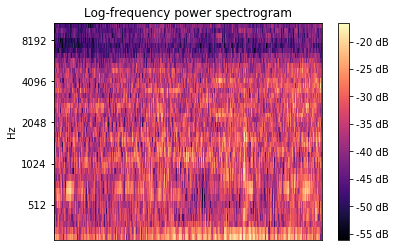

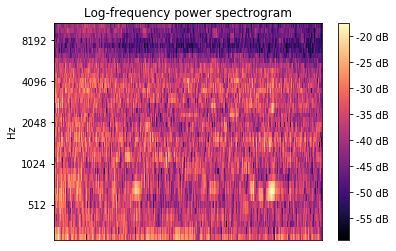

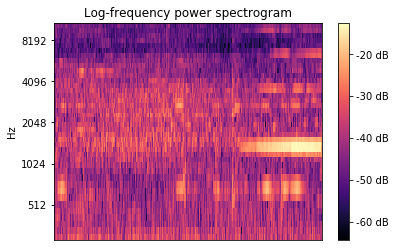

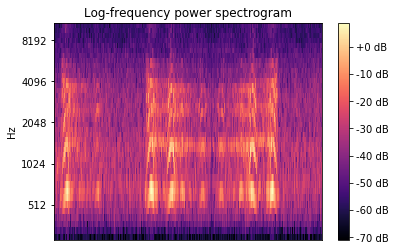

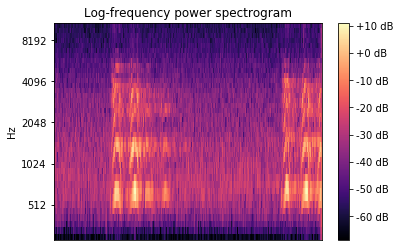

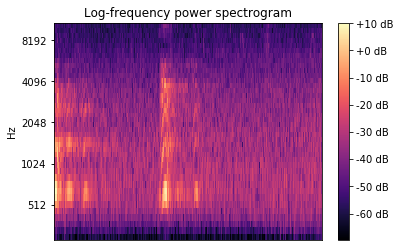

In [10]:
import matplotlib.pyplot as plt
for mels in X_valid[:10]:
    audio_preprocessing.show_melspectrogram(mels)
    plt.show()

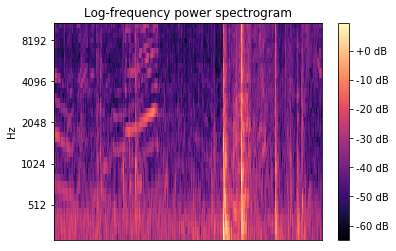

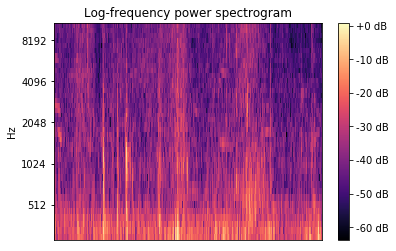

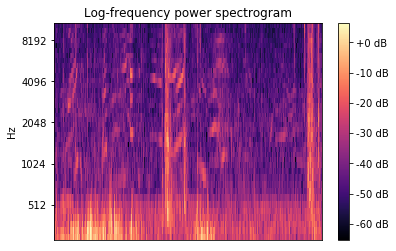

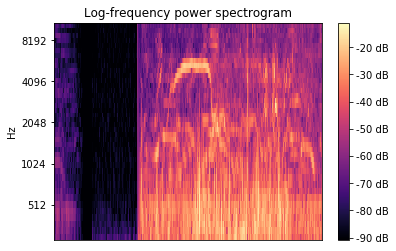

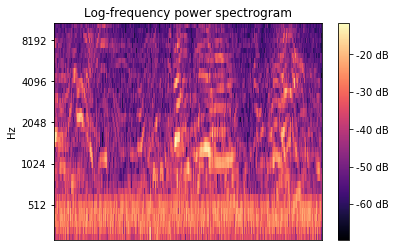

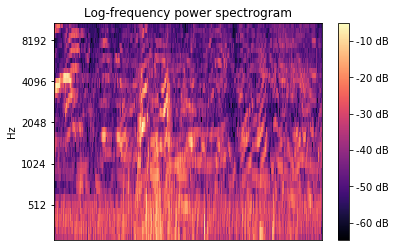

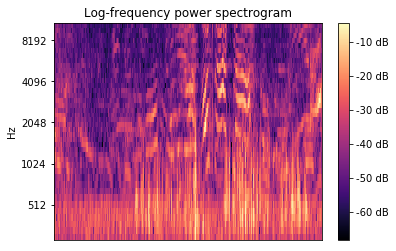

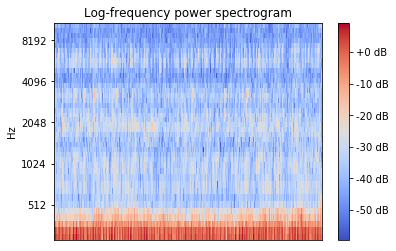

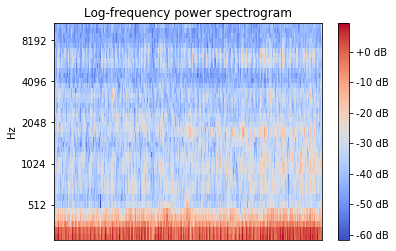

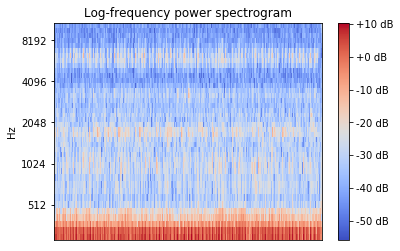

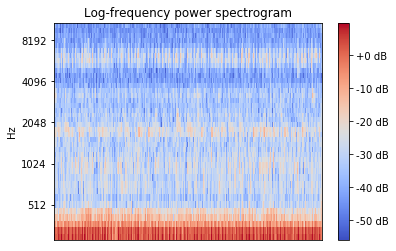

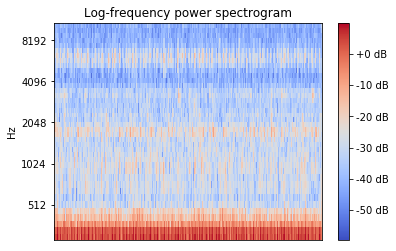

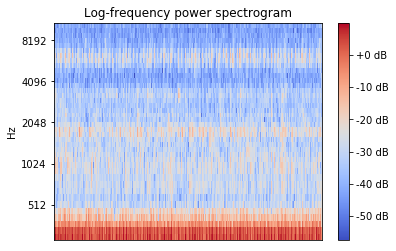

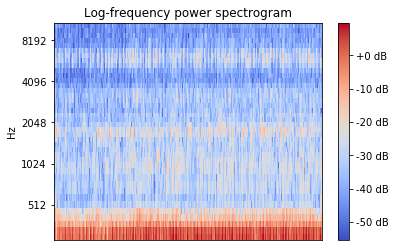

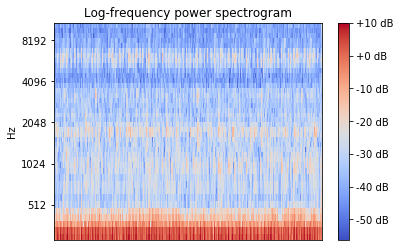

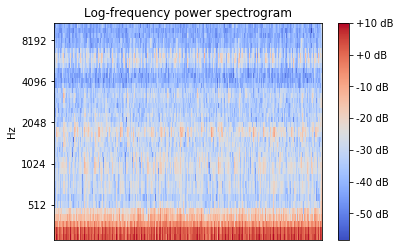

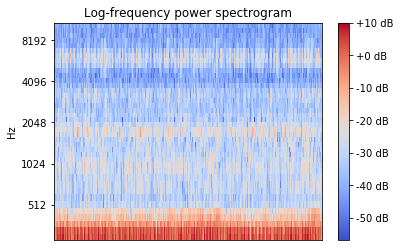

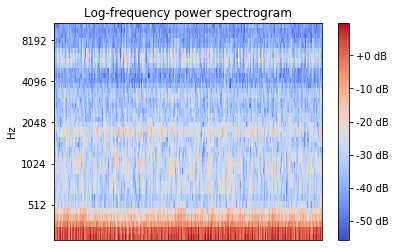

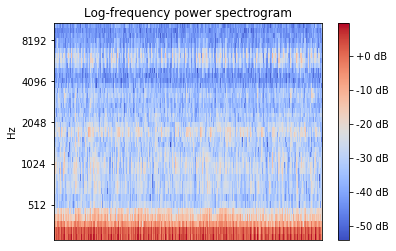

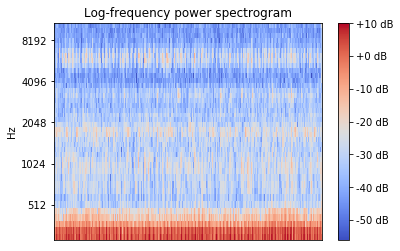

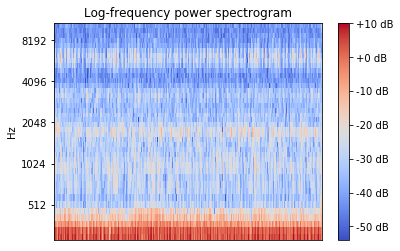

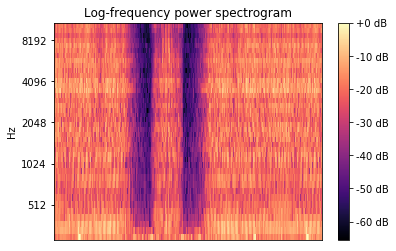

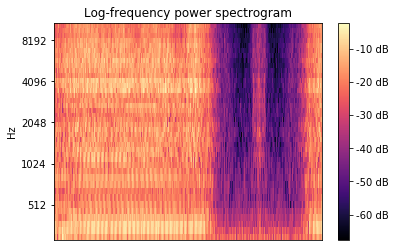

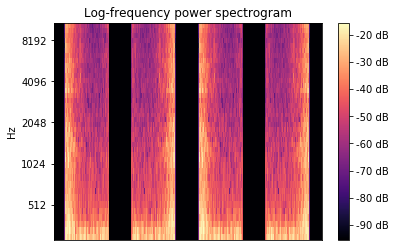

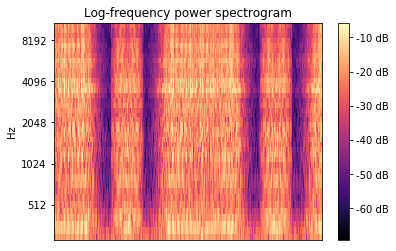

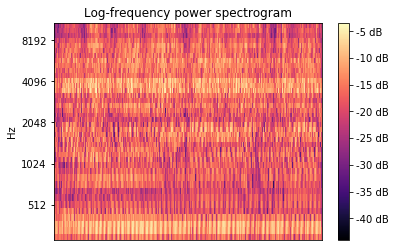

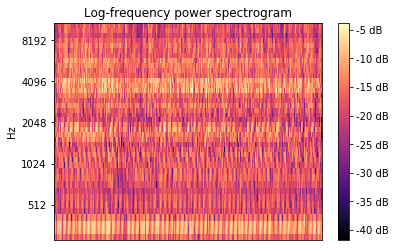

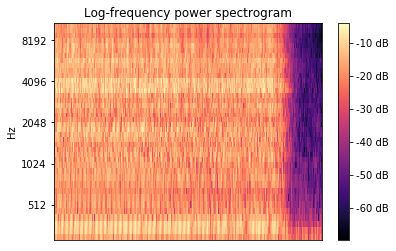

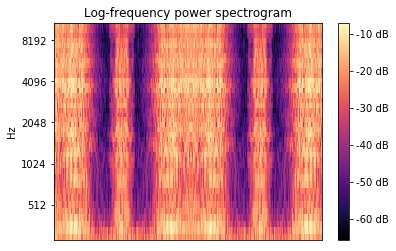

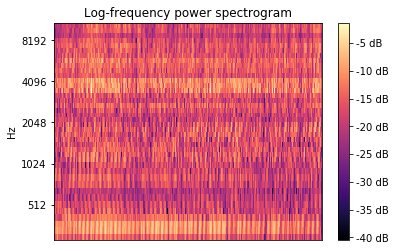

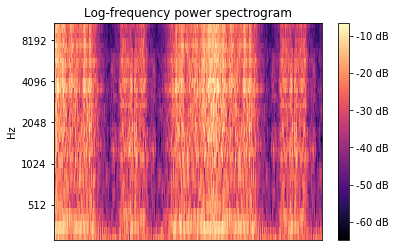

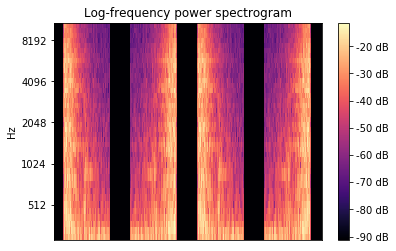

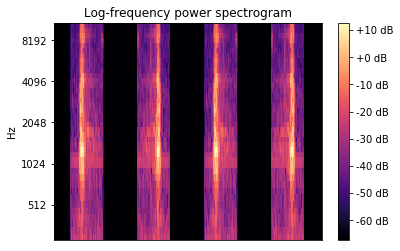

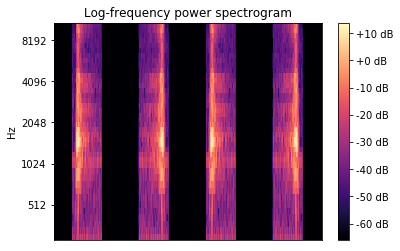

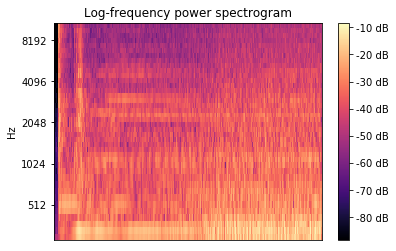

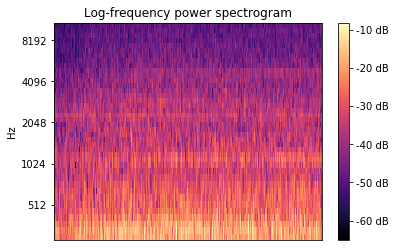

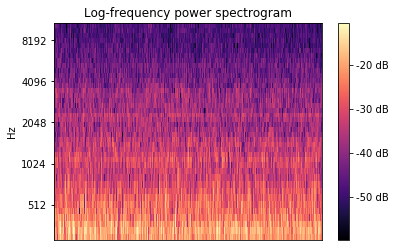

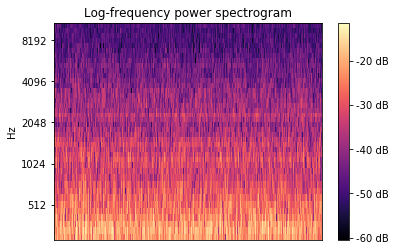

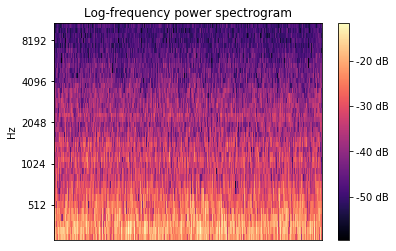

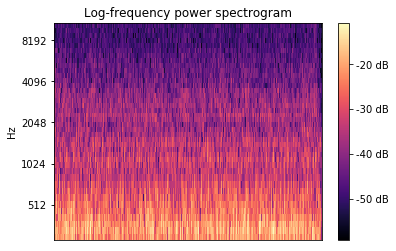

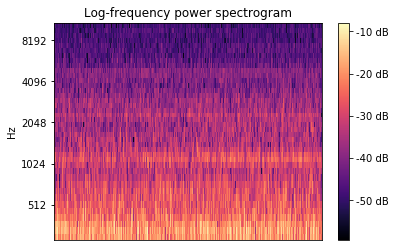

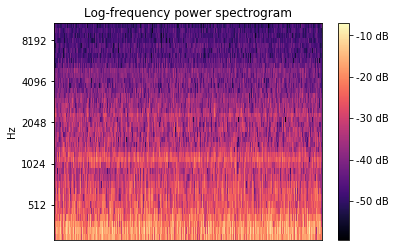

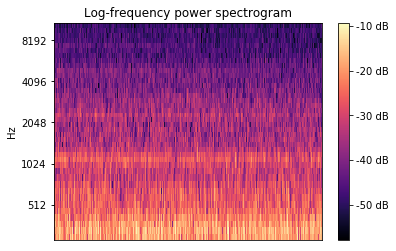

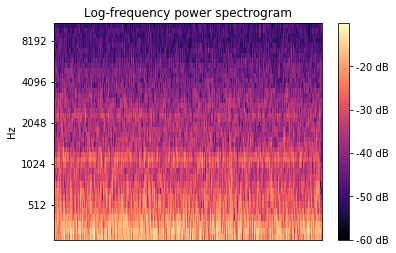

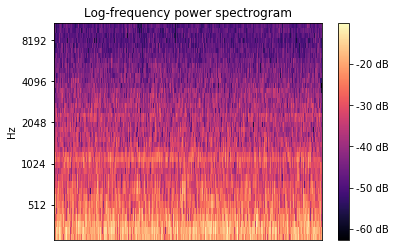

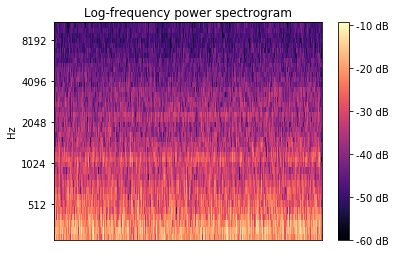

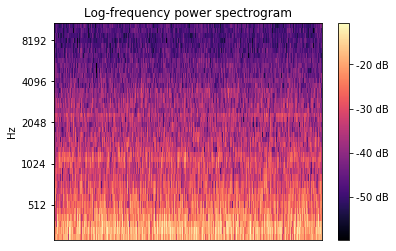

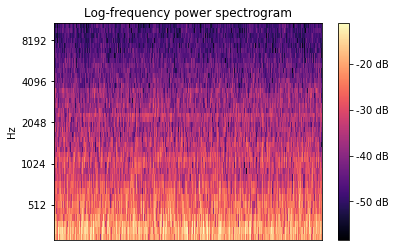

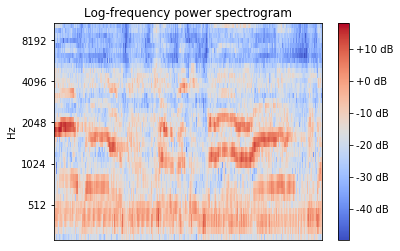

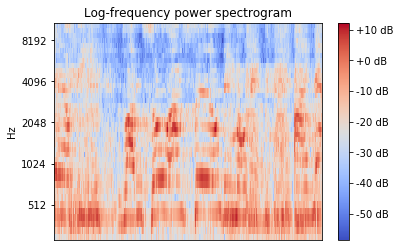

In [11]:
n = 50
start = 200
for mels in X_train[start:start + n]:
    audio_preprocessing.show_melspectrogram(mels)
    plt.show()